In [1]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.3 (python 3.8.5) on 2021-06-01 12:03.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
data = scv.read("./rgl_neuroblast_glioblast.loom", cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
data.var_names_make_unique()
data = data[(data.obs.Clusters < 321)]


In [5]:
#Radial glia cells : keep only the ones of e9 and only 2500 of them
radial = data[data.obs.Class == "Radial glia"]
radial9 = radial[radial.obs['Age'] == 'e9.0']
radial9 = radial9[1:500]
radial10 = radial[radial.obs['Age'] == 'e10.0']
radial10 = radial10[1:500]
radial11 = radial[radial.obs['Age'] == 'e11.0']
radial11 = radial11[1:500]
radial12 = radial[radial.obs['Age'] == 'e12.0']
radial12 = radial12[1:500]
radial13 = radial[radial.obs['Age'] == 'e13.0']
radial13 = radial13[1:500]
radial135 = radial[radial.obs['Age'] == 'e13.5']
radial135 = radial135[1:500]

radial = radial9.concatenate(radial10, radial11, radial12, radial13, radial135, join = 'outer')


#Early neural tube cells : take them all
early_neural_tube = data[data.obs.Class == "Early Neural Tube"]

#OPCs : take them all
opc_s = data[data.obs.Class == "OPCs"]

#Glia cells : take approx 2500 of them
glia = data[data.obs.Class == "Glia"]
glia_14 = glia[glia.obs['Age']  == 'e14.0']
glia_135 = glia[glia.obs['Age']  == 'e13.5']
glia_15 = glia[glia.obs['Age']  == 'e15']
glia_155 = glia[glia.obs['Age']  == 'e15.5']
glia_16 = glia[glia.obs['Age']  == 'e16.0']
glia_16 = glia_16[1:500]
glia_165 = glia[glia.obs['Age']  == 'e16.5']
glia_165 = glia_165[1:500]
glia_17 = glia[glia.obs['Age']  == 'e17.0']
glia_17 = glia_17[1:500]
glia_18 = glia[glia.obs['Age']  == 'e18.0']
glia_18 = glia_18[1:500]
glia = glia_14.concatenate(glia_135, glia_15, glia_155, glia_16, glia_165, glia_17, glia_18, join='outer')

In [6]:
adata = radial.concatenate(early_neural_tube, opc_s, glia, join='outer')

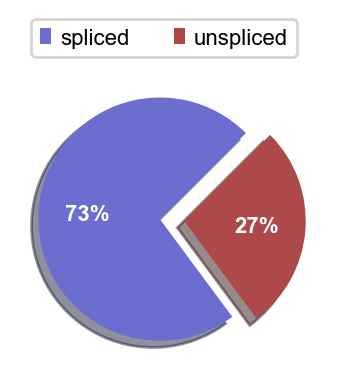

In [7]:
scv.pl.proportions(adata)

Preprocess the Data

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 2918 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:26) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


Dynamical model

In [9]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/4 cores)



    finished (0:16:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [10]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:13) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [11]:
adata.write('../scvelo_final1.h5ad', compression='gzip')